In [1]:
import scipy.linalg as la
from math_functions.Get_state_index import Get_State_index
from main_grape.Grape import Grape
%pylab inline
import random as rd
import time
from IPython import display


Populating the interactive namespace from numpy and matplotlib


In [3]:
#Defining time scales
total_time = 1.0
steps = 80


#Defining H0



#Defining Forbidden sates

#states_forbidden_list = []

#Defining Concerned states (starting states)
psi0 = [0,1,2,3,4,5,6,7]

#Defining states to include in the drawing of occupation
states_draw_list = [0,1,2,3,4,5,6,7]
states_draw_names = ['000','001','010','011','100','101','110','111']

#Defining U (Target)

U= np.identity(8)
U[7,7]=0
U[6,6]=0
U[6,7]=1
U[7,6]=1


#Defining U0 (Initial)
q_identity = np.identity(8)
U0= q_identity

#Defining control Hs
Q_x   = np.diag(np.sqrt(np.arange(1,2)),1)+np.diag(np.sqrt(np.arange(1,2)),-1)
Q_y   = (0+1j) *(np.diag(np.sqrt(np.arange(1,2)),1)-np.diag(np.sqrt(np.arange(1,2)),-1))
Q_z   = np.diag(np.arange(0,2))
Q_I = np.identity(2)

Q_x1 = np.kron(Q_x,np.kron(Q_I,Q_I))
Q_y1 = np.kron(Q_y,np.kron(Q_I,Q_I))
Q_z1 = np.kron(Q_z,np.kron(Q_I,Q_I))
Q_x2 = np.kron(Q_I,np.kron(Q_x,Q_I))
Q_y2 = np.kron(Q_I,np.kron(Q_y,Q_I))
Q_z2 = np.kron(Q_I,np.kron(Q_z,Q_I))
Q_x3 = np.kron(Q_I,np.kron(Q_I,Q_x))
Q_y3 = np.kron(Q_I,np.kron(Q_I,Q_y))
Q_z3 = np.kron(Q_I,np.kron(Q_I,Q_z))
Q_xxi = np.kron(Q_x,np.kron(Q_x,Q_I))
Q_xix = np.kron(Q_x,np.kron(Q_I,Q_x))
Q_ixx = np.kron(Q_I,np.kron(Q_x,Q_x))
Q_yyi = np.kron(Q_y,np.kron(Q_y,Q_I))
Q_yiy = np.kron(Q_y,np.kron(Q_I,Q_y))
Q_iyy = np.kron(Q_I,np.kron(Q_y,Q_y))
Q_zzi = np.kron(Q_z,np.kron(Q_z,Q_I))
Q_ziz = np.kron(Q_z,np.kron(Q_I,Q_z))
Q_izz = np.kron(Q_I,np.kron(Q_z,Q_z))


H0 =  2 * np.pi * (Q_z1 + Q_z2 + Q_z3)
Hops = [Q_x1,Q_y1,Q_z1,Q_x2,Q_y2,Q_z2,Q_x3,Q_y3,Q_z3,Q_xxi, Q_xix, Q_ixx, Q_yyi, Q_yiy, Q_iyy,Q_zzi, Q_ziz, Q_izz ]
ops_max_amp = [4.0,4.0, 2*np.pi*2.0,4.0,4.0, 2*np.pi*2.0,4.0,4.0, 2*np.pi*2.0,4.0,4.0,4.0,4.0,4.0,4.0, 2*np.pi*2.0,2*np.pi*2.0,2*np.pi*2.0]

Hnames =[ 'x1','y1', 'z1', 'x2','y2', 'z2', 'x3','y3', 'z3','xxi','xix','ixx', 'yyi','yiy','iyy', 'zzi','ziz','izz']

ops_max_amp = 4*np.ones(len(Hops))
u0=[]
for ii in range (len(Hops)):
    u0.append(np.ones(steps))

H_time_scales = {'9':0.1}
#Defining convergence parameters
max_iterations = 1000
decay = max_iterations/2
convergence = {'rate':0.01, 'update_step':10, 'max_iterations':max_iterations,\
               'conv_target':1e-8,'learning_rate_decay':decay}
reg_coeffs = {'alpha' : 0, 'z':0, 'dwdt':0,'d2wdt2':0, 'inter':0, 'test':0.0001}
#multi_mode = {'dressed':dressed, 'vectors':v_c, 'qnum':qubit_state_num, 'mnum': mode_state_num,\
              #'f':freq_ge, 'es':w_c, 'g1':qm_g1, 'D':D, 'Interpolation':True, 'Modulation':True}
print U

[[ 1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.]]


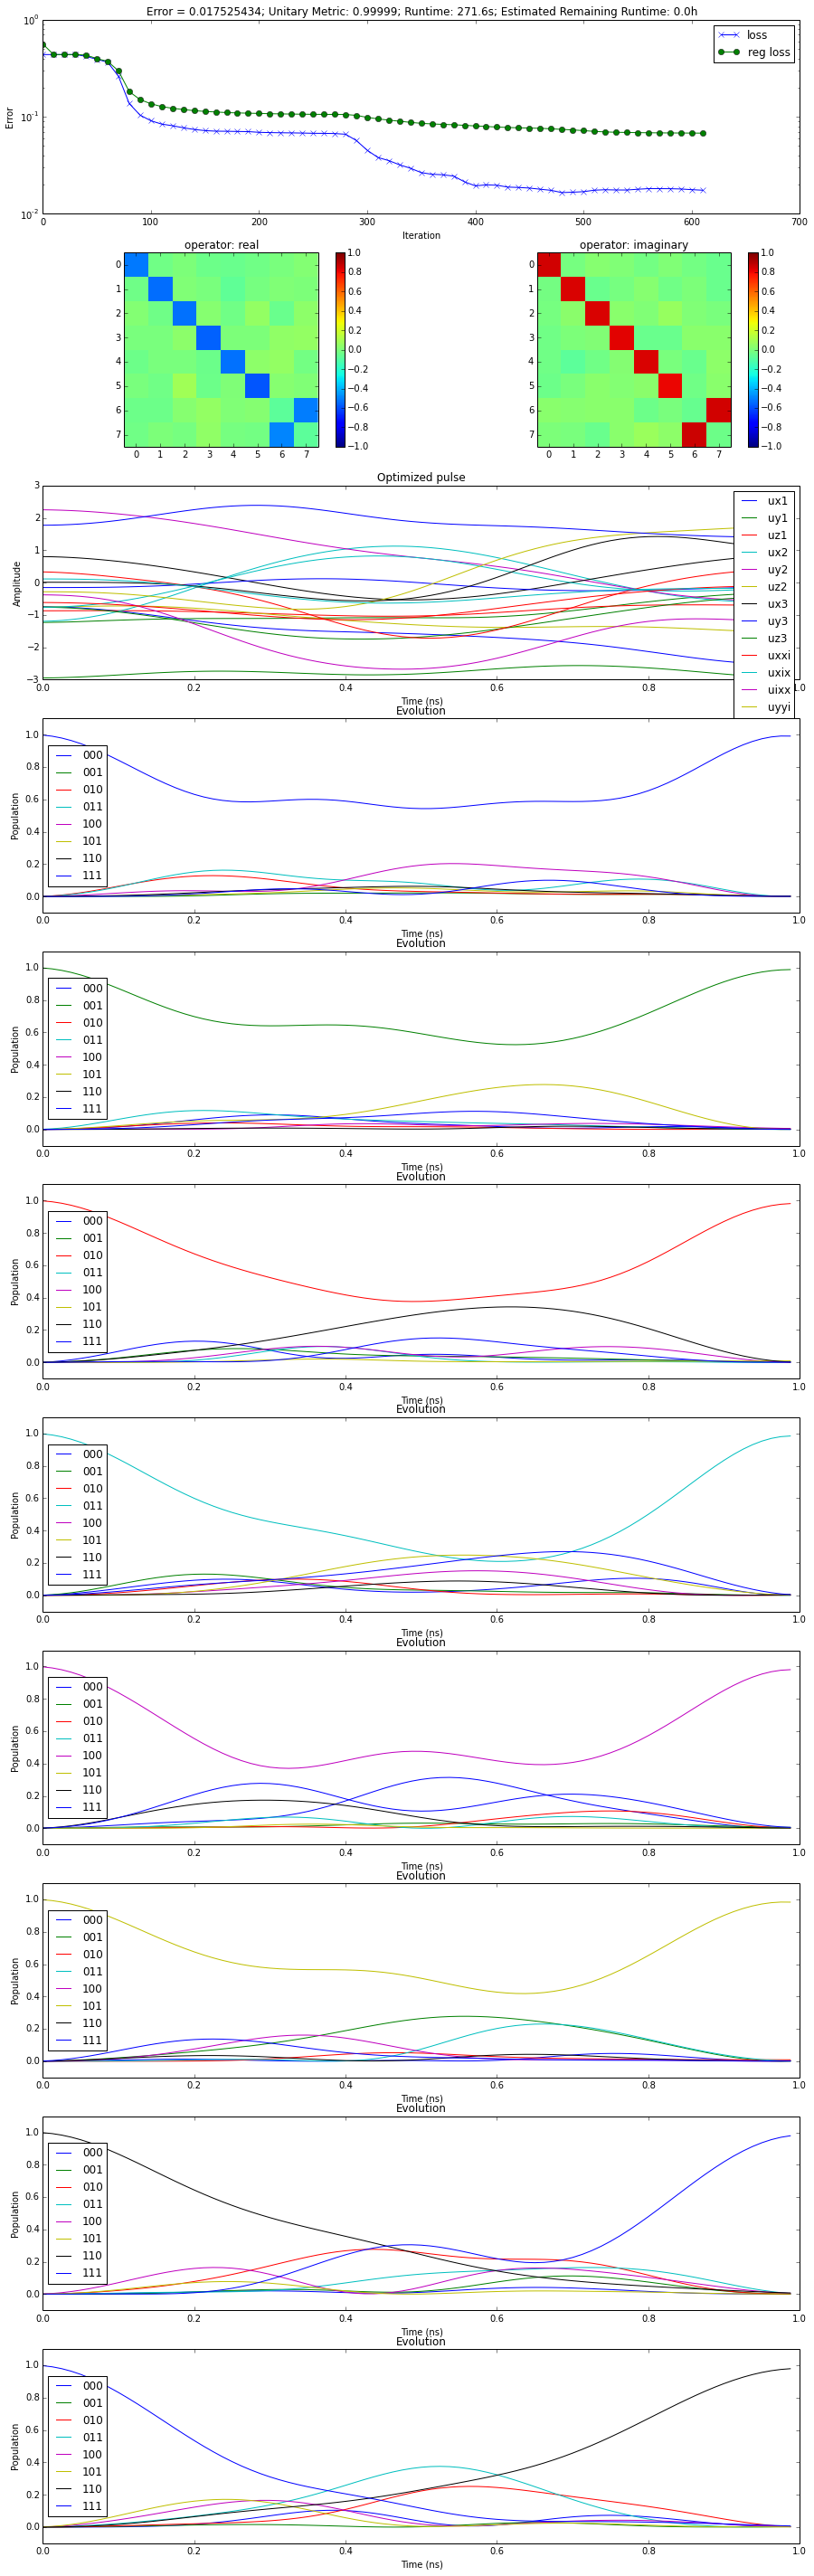

In [4]:
 #Extra options
#reg_coeffs = reg_coeffs,draw = [states_draw_list,states_draw_names] ,forbidden = states_forbidden_list,multi_mode = multi_mode,
#maxA = ops_max_amp,use_gpu = True
Grape(H0,Hops,Hnames,U,U0,total_time,steps,psi0,convergence, draw = [states_draw_list,states_draw_names] ,\
      maxA = ops_max_amp, use_gpu=True, Unitary_error = 1e-9,show_plots=True, method ='L-BFGS-B')